<a href="https://colab.research.google.com/github/yunyoung207/DNN/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<구글 드라이브 마운트(구글 드라이브에 있는 파일 읽고 쓰기 위해서 설정)>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

<심층 신경망으로 손글씨 숫자 인식하기 위한 모델 만들기>

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9800 - acc: 0.6872 - val_loss: 0.4627 - val_acc: 0.8642
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4049 - acc: 0.8818 - val_loss: 0.3331 - val_acc: 0.9035
Epoch 3/5
60000/60000 [==============================] 

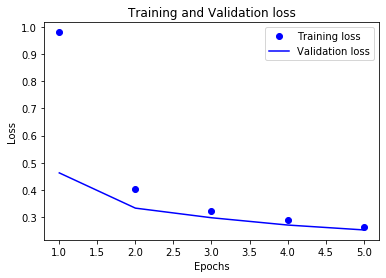

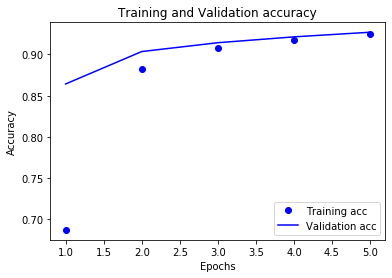

In [72]:
# 0. 사용할 패키지 불러오기
import tensorflow
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터셋 생성하기

# 훈련셋과 테스트셋 불러오기
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = mnist.load_data()

# 데이터셋 전처리(0~1사이의 숫자로 변환)
train_x = raw_train_x / 255
test_x = raw_test_x / 255

train_y = raw_train_y
test_y = raw_test_y

train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))

# 2. 모델 구성하기
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(28*28,))) #첫 번째 은닉층
model.add(Dense(10, activation='relu'))                       #두 번째 은닉층
model.add(Dense(10, activation='softmax'))                    #출력층

# 3. 모델 학습과정 설정하기
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
model.summary()

# 4. 모델 학습시키기
history=model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128, validation_data=(test_x,test_y))

# 5. 모델 평가하기
loss, acc = model.evaluate(test_x, test_y)

print("Test loss : ",loss)
print("Test accuracy : ",acc)

# 6. 모델 저장하기
model.save("MNIST_DNN_model.h5")


# 학습과정 살펴보기
# 훈련과 검증 오차 그리기
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
             
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련과 검증 정확도 그리기
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
             
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


<테스트해보기(첫번째 데이터부터 열여섯 번째 데이터까지 출력하고 예측하기)>

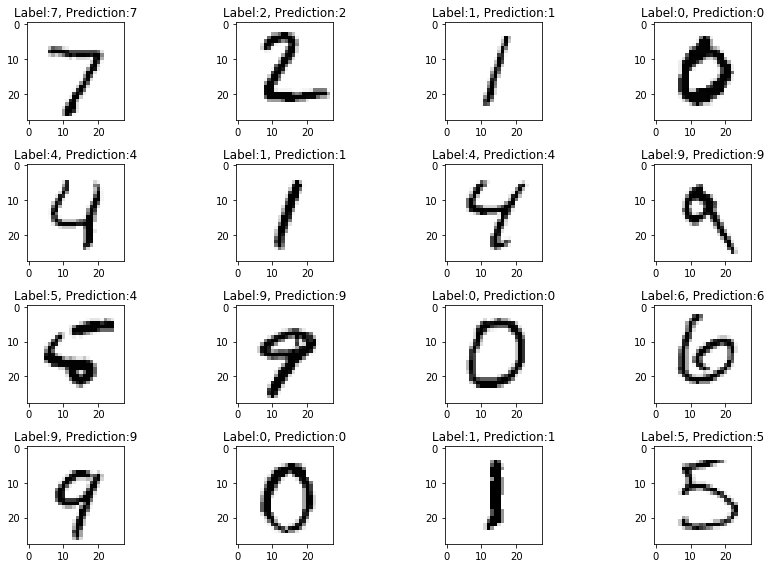

In [64]:
# 예측 결과를 확인하기 위해 테스트 데이터 16개 출력해보기
predicted_result = model.predict(test_x)
predicted_lablels = np.argmax(predicted_result, axis=1)

plt.figure(figsize=(12,8))
count = 0

for i in range(16):
  count +=1
  plt.subplot(4,4,count)
  plt.imshow(test_x[i].reshape(28,28), cmap="Greys", interpolation="nearest")
  tmp = "Label:"+str(test_y[i])+", Prediction:"+str(predicted_lablels[i])
  plt.title(tmp)

plt.tight_layout()
plt.show()  

<예측이 틀린 데이터중에서 16개만 뽑아서 출력해보기>

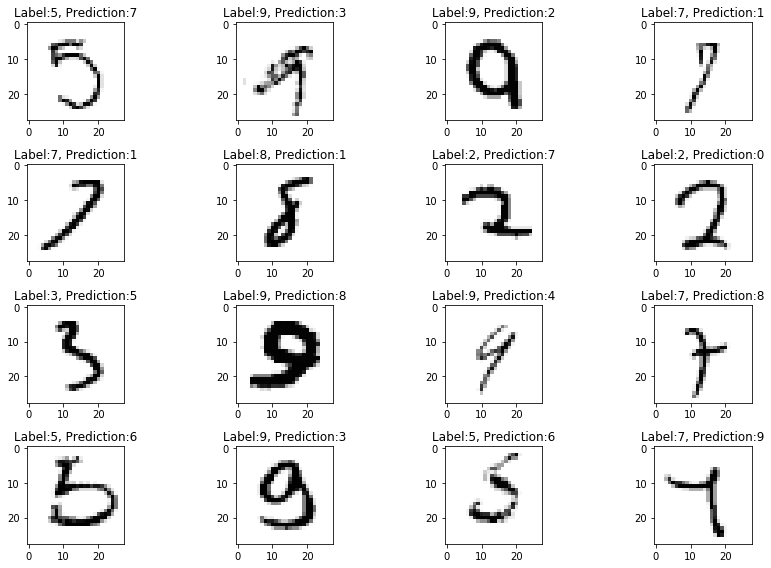

In [0]:
#예측이 틀린 데이터중에서 16개만 뽑아서 출력해보기
import random

predicted_result = model.predict(test_x)
predicted_lablels = np.argmax(predicted_result, axis=1)

wrong_result = []

for i in range(0, len(test_y)):
  if predicted_lablels[i] != test_y[i]:
    wrong_result.append(i)

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(12,8))
count = 0

for i in samples:
  count +=1
  plt.subplot(4,4,count)
  plt.imshow(test_x[i].reshape(28,28), cmap="Greys", interpolation="nearest")
  tmp = "Label:"+str(test_y[i])+", Prediction:"+str(predicted_lablels[i])
  plt.title(tmp)

plt.tight_layout()
plt.show()  



<내가 쓴 숫자로 테스트 해 보기>

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
The Answer is  [3]


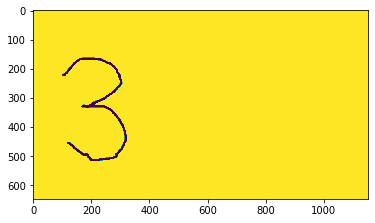

In [71]:
# 8. 모델 사용하기
# 내가 쓴 숫자로 테스트 해 보기(그림판에 숫자 쓴 뒤 test01.png로 저장. test01.png를 구글 드라이브에 업로드)
import cv2
import numpy as np
import math
from scipy import ndimage

from tensorflow.keras.models import load_model

# 저장한 모델 불러오기
loaded_model = load_model("MNIST_DNN_model.h5")
loaded_model.summary()

# 이미지 전처리(색, 사이즈(28*28), 가운데로 숫자 오도록 조정)
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

images = np.zeros((1, 784))

gray = cv2.imread("/content/drive/My Drive/test01.png", 0)
plt.imshow(gray)

gray = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

(thresh, gray) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

while np.sum(gray[0]) == 0:
   gray = gray[1:]

while np.sum(gray[:, 0]) == 0:
    gray = np.delete(gray, 0, 1)

while np.sum(gray[-1]) == 0:
    gray = gray[:-1]

while np.sum(gray[:, -1]) == 0:
    gray = np.delete(gray, -1, 1)

rows, cols = gray.shape

if rows > cols:
    factor = 20.0 / rows
    rows = 20
    cols = int(round(cols * factor))
    # first cols than rows
    gray = cv2.resize(gray, (cols, rows))
else:
    factor = 20.0 / cols
    cols = 20
    rows = int(round(rows * factor))
    # first cols than rows
    gray = cv2.resize(gray, (cols, rows))

colsPadding = (int(math.ceil((28 - cols) / 2.0)), int(math.floor((28 - cols) / 2.0)))
rowsPadding = (int(math.ceil((28 - rows) / 2.0)), int(math.floor((28 - rows) / 2.0)))
gray = np.lib.pad(gray, (rowsPadding, colsPadding), 'constant')

shiftx, shifty = getBestShift(gray)
shifted = shift(gray, shiftx, shifty)
gray = shifted

flatten = gray.flatten() / 255.0
images[0] = flatten

# 내가 쓴 숫자 예측하기
predicted_result = loaded_model.predict(images)
predicted_lablels = np.argmax(predicted_result, axis=1)
print("The Answer is ", predicted_lablels)